In [9]:
from pandas import read_csv
import numpy as np
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

### <a id='toc1_1_1_'></a>[ЗАДАНИЕ №1](#toc0_)
Загрузите датасет Life.csv  с информацией о продолжительности жизни в различных странах

In [10]:
file = read_csv('Life.csv')

### <a id='toc1_1_1_'></a>[ЗАДАНИЕ №2](#toc0_)
Выполните очистку данных (удалите пропущенные значения)

In [11]:
file = file.dropna()
print(file)

          Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71

### <a id='toc1_1_1_'></a>[ЗАДАНИЕ №3](#toc0_)
Постройте матрицу корреляции и тепловую карту.

                                     Year  Life expectancy  Adult Mortality  \
Year                             1.000000         0.050771        -0.037092   
Life expectancy                  0.050771         1.000000        -0.702523   
Adult Mortality                 -0.037092        -0.702523         1.000000   
infant deaths                    0.008029        -0.169074         0.042450   
Alcohol                         -0.113365         0.402718        -0.175535   
percentage expenditure           0.069553         0.409631        -0.237610   
Hepatitis B                      0.114897         0.199935        -0.105225   
Measles                         -0.053822        -0.068881        -0.003967   
BMI                              0.005739         0.542042        -0.351542   
under-five deaths                0.010479        -0.192265         0.060365   
Polio                           -0.016699         0.327294        -0.199853   
Total expenditure                0.059493         0.

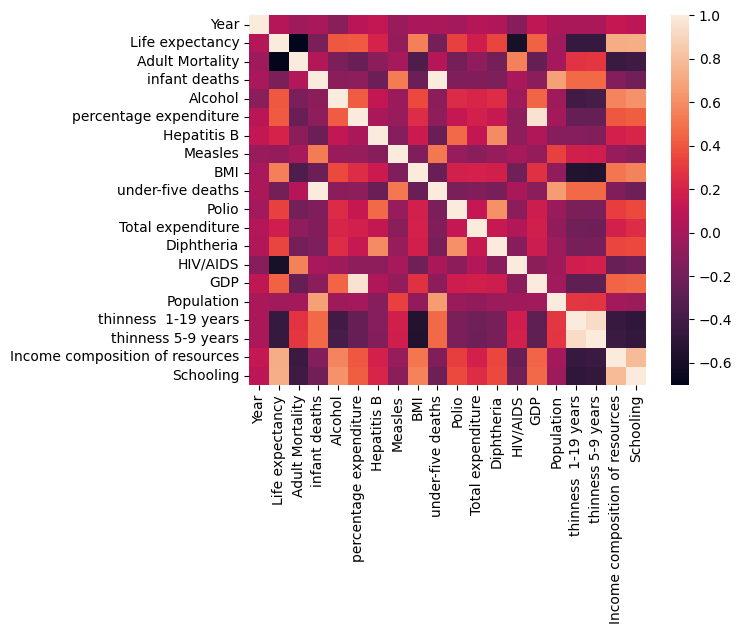

In [12]:
matrix_corr = file.select_dtypes(include=np.number).corr()
#print(matrix_corr.abs().sum().sort_values(ascending=False))
print(matrix_corr, heatmap(matrix_corr))

### <a id='toc1_1_1_'></a>[ЗАДАНИЕ №4](#toc0_)
Выберите набор данных, которые максимально коррелируют со столбцом Life expectancy (это будет целевая переменная). Обратите внимание, что в названиях столбцов есть пробелы, поэтому лучше их копировать из исходного файла. При выборе столбцов учитывайте, что коэффициент корреляции может быть и отрицательным.

In [13]:
max_corr = matrix_corr[matrix_corr != 1].unstack().abs().sort_values(ascending=False)['Life expectancy']
print(max_corr)

Schooling                          0.727630
Income composition of resources    0.721083
Adult Mortality                    0.702523
HIV/AIDS                           0.592236
BMI                                0.542042
thinness  1-19 years               0.457838
thinness 5-9 years                 0.457508
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
Hepatitis B                        0.199935
under-five deaths                  0.192265
Total expenditure                  0.174718
infant deaths                      0.169074
Measles                            0.068881
Year                               0.050771
Population                         0.022305
Life expectancy                         NaN
dtype: float64


### <a id='toc1_1_1_'></a>[ЗАДАНИЕ №5](#toc0_)
Создайте обучающий и тестовый наборы данных

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(file[max_corr[:((len(matrix_corr)-1))].index], file['Life expectancy'], test_size = 0.3, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1154, 19) (1154,)
(495, 19) (495,)


### <a id='toc1_1_1_'></a>[ЗАДАНИЕ №6](#toc0_)
Постройте модель линейной регрессии и оцените ее качество. С помощью RMSE и R2.

In [15]:
model = LinearRegression().fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(f'Коэффициенты модели: {model.coef_}\n\nСвободный член: {model.intercept_}' +
      f'\n\nRoot Mean Squared Error (RMSE): {np.sqrt(metrics.mean_squared_error(Y_test, y_pred))}\n' +
      f'R2: {np.round(metrics.r2_score(Y_test, y_pred), 2)}')

Коэффициенты модели: [ 1.03617194e+00  8.99707293e+00 -1.61355252e-02 -4.36695181e-01
  2.43116748e-02 -4.19490698e-02 -4.89328464e-02  6.33007904e-06
  4.16539566e-04 -1.37527635e-01  1.50885059e-02  5.25542623e-03
 -4.83698876e-03 -6.61328835e-02  1.05590060e-01  8.81574904e-02
 -1.04148659e-05 -1.14717857e-01  3.97790245e-10]

Свободный член: 282.8317732901005

Root Mean Squared Error (RMSE): 3.652118285871063
R2: 0.83


### <a id='toc1_1_1_'></a>[ЗАДАНИЕ №7](#toc0_)
Если R2 получился менее 0,8, то попробуйте изменить набор значимых признаков.

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(file[max_corr.drop('Income composition of resources').index], file['Income composition of resources'], test_size = 0.3, random_state = 42)
model = LinearRegression().fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(f'Коэффициенты модели: {model.coef_}\n\nСвободный член: {model.intercept_}' +
      f'\n\nRoot Mean Squared Error (RMSE): {np.sqrt(metrics.mean_squared_error(Y_test, y_pred))}\n' +
      f'R2: {np.round(metrics.r2_score(Y_test, y_pred), 2)}')

Коэффициенты модели: [ 2.18348263e-02  2.71236196e-05  3.62294519e-03  3.93026594e-04
 -1.38871989e-03  6.27054280e-04  1.55673578e-06 -8.06755137e-06
  8.09371888e-03  7.23774884e-04 -3.39524331e-05 -1.62381769e-04
 -2.03409896e-04 -1.74396943e-03  3.74039645e-04  2.09871350e-07
  5.80540326e-03 -2.86923795e-11  8.98359138e-03]

Свободный член: -12.016073001202452

Root Mean Squared Error (RMSE): 0.07223318218602298
R2: 0.81
